In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from pystac.extensions.item_assets import ItemAssetsExtension

import pystac_client
import planetary_computer

from shapely import Polygon
from shapely import box

In [5]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [15]:
# Xochimilco
# x = [
# [-99.11659789905933, 19.28243648833032],
# [-99.11659789905933, 19.241327757557883],
# [-99.06921169946003, 19.241327757557883],
# [-99.06921169946003, 19.28243648833032],
# [-99.11659789905933, 19.28243648833032]
# ]

# mexico city
# x = [
# [-99.42299722845537, 19.70360812324293],
# [-99.42299722845537, 19.15619640121247],
# [-98.77258803455524, 19.15619640121247],
# [-98.77258803455524, 19.70360812324293],
# [-99.42299722845537, 19.70360812324293]
# ]

# yucatan
# x = [
# [-89.86070108039905, 21.11252414180828],
# [-89.86070108039905, 19.771577997140056],
# [-88.06420383256244, 19.771577997140056],
# [-88.06420383256244, 21.11252414180828],
# [-89.86070108039905, 21.11252414180828]
# ]


# sequoia natl park
x = [
[-119.28376473993174, 36.65291223580975],
[-119.28376473993174, 35.561681976121605],
[-117.15965333370627, 35.561681976121605],
[-117.15965333370627, 36.65291223580975],
[-119.28376473993174, 36.65291223580975]
]

In [16]:
Polygon(x).bounds

(-119.28376473993174,
 35.561681976121605,
 -117.15965333370627,
 36.65291223580975)

In [17]:
# xochimilco
#box_bounds = [-99.11659789905933, 19.241327757557883, -99.06921169946003, 19.28243648833032]

# mexico city
#box_bounds = [-99.42299722845537, 19.15619640121247, -98.77258803455524, 19.70360812324293]

# yucatan
#box_bounds = [-89.86070108039905, 19.771577997140056, -88.06420383256244, 21.11252414180828]

# sequoia natl park
box_bounds = [-119.28376473993174, 35.561681976121605, -117.15965333370627, 36.65291223580975]

In [18]:
datetime = '2023'

In [19]:
search = catalog.search(collections=["modis-13A1-061"],
                        datetime=datetime,
                        bbox=box_bounds)

In [20]:
items = search.item_collection()
len(items)

41

In [21]:
for item in items:
    print(item.properties['start_datetime'])

2023-11-09T00:00:00Z
2023-11-01T00:00:00Z
2023-10-24T00:00:00Z
2023-10-16T00:00:00Z
2023-10-08T00:00:00Z
2023-09-30T00:00:00Z
2023-09-22T00:00:00Z
2023-09-14T00:00:00Z
2023-09-06T00:00:00Z
2023-08-29T00:00:00Z
2023-08-21T00:00:00Z
2023-08-13T00:00:00Z
2023-08-05T00:00:00Z
2023-07-28T00:00:00Z
2023-07-20T00:00:00Z
2023-07-12T00:00:00Z
2023-07-04T00:00:00Z
2023-06-26T00:00:00Z
2023-06-18T00:00:00Z
2023-06-10T00:00:00Z
2023-06-02T00:00:00Z
2023-05-25T00:00:00Z
2023-05-17T00:00:00Z
2023-05-09T00:00:00Z
2023-05-01T00:00:00Z
2023-04-23T00:00:00Z
2023-04-15T00:00:00Z
2023-04-07T00:00:00Z
2023-03-30T00:00:00Z
2023-03-22T00:00:00Z
2023-03-14T00:00:00Z
2023-03-06T00:00:00Z
2023-02-26T00:00:00Z
2023-02-10T00:00:00Z
2023-02-02T00:00:00Z
2023-01-25T00:00:00Z
2023-01-17T00:00:00Z
2023-01-09T00:00:00Z
2023-01-01T00:00:00Z
2022-12-27T00:00:00Z
2022-12-19T00:00:00Z


In [22]:
for item in items:
    print(item.properties['end_datetime'])

2023-11-24T23:59:59Z
2023-11-16T23:59:59Z
2023-11-08T23:59:59Z
2023-10-31T23:59:59Z
2023-10-23T23:59:59Z
2023-10-15T23:59:59Z
2023-10-07T23:59:59Z
2023-09-29T23:59:59Z
2023-09-21T23:59:59Z
2023-09-13T23:59:59Z
2023-09-05T23:59:59Z
2023-08-28T23:59:59Z
2023-08-20T23:59:59Z
2023-08-12T23:59:59Z
2023-08-04T23:59:59Z
2023-07-27T23:59:59Z
2023-07-19T23:59:59Z
2023-07-11T23:59:59Z
2023-07-03T23:59:59Z
2023-06-25T23:59:59Z
2023-06-17T23:59:59Z
2023-06-09T23:59:59Z
2023-06-01T23:59:59Z
2023-05-24T23:59:59Z
2023-05-16T23:59:59Z
2023-05-08T23:59:59Z
2023-04-30T23:59:59Z
2023-04-22T23:59:59Z
2023-04-14T23:59:59Z
2023-04-06T23:59:59Z
2023-03-29T23:59:59Z
2023-03-21T23:59:59Z
2023-03-13T23:59:59Z
2023-02-25T23:59:59Z
2023-02-17T23:59:59Z
2023-02-09T23:59:59Z
2023-02-01T23:59:59Z
2023-01-24T23:59:59Z
2023-01-16T23:59:59Z
2023-01-11T23:59:59Z
2023-01-03T23:59:59Z


In [32]:
item23 = items[0]
item23.properties['end_datetime']

'2023-11-24T23:59:59Z'

In [23]:
item.assets

{'hdf': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061/MOD13A1/08/05/2022353/MOD13A1.A2022353.h08v05.061.2023006045028.hdf?st=2023-11-29T01%3A34%3A50Z&se=2023-12-07T01%3A34%3A50Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-11-30T01%3A34%3A49Z&ske=2023-12-07T01%3A34%3A49Z&sks=b&skv=2021-06-08&sig=XxYJzQ/tr%2B179RXkC1Db8o1vDxG6LrJ3ppNwdJTBzE8%3D>,
 'metadata': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061/MOD13A1/08/05/2022353/MOD13A1.A2022353.h08v05.061.2023006045028.hdf.xml?st=2023-11-29T01%3A34%3A50Z&se=2023-12-07T01%3A34%3A50Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-11-30T01%3A34%3A49Z&ske=2023-12-07T01%3A34%3A49Z&sks=b&skv=2021-06-08&sig=XxYJzQ/tr%2B179RXkC1Db8o1vDxG6LrJ3ppNwdJTBzE8%3D>,
 '500m_16_days_EVI': <Asset href=https://modiseuwest.blob.core.windows.net/modis-061-cogs/MOD13A1/08/05/20223

In [24]:
data = rioxr.open_rasterio(item.assets['500m_16_days_NDVI'].href).squeeze()
data

<xarray.DataArray (y: 2400, x: 2400)>
[5760000 values with dtype=int16]
Coordinates:
    band         int64 1
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes: (12/183)
    add_offset:                          0.0
    add_offset_err:                      0
    ALGORITHMPACKAGEACCEPTANCEDATE:      102004
    ALGORITHMPACKAGEMATURITYCODE:        Normal
    ALGORITHMPACKAGENAME:                MOD_PR13A1
    ALGORITHMPACKAGEVERSION:             6
    ...                                  ...
    units:                               NDVI
    valid_range:                         -2000, 10000
    VERSIONID:                           61
    VERTICALTILENUMBER:                  5
    WESTBOUNDINGCOORDINATE:              -130.540728914638
    _FillValue:                          -3000

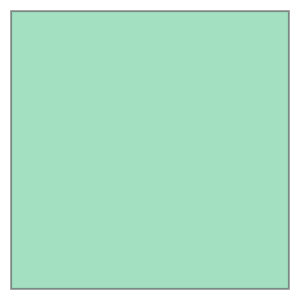

In [25]:
box(*data.rio.bounds())

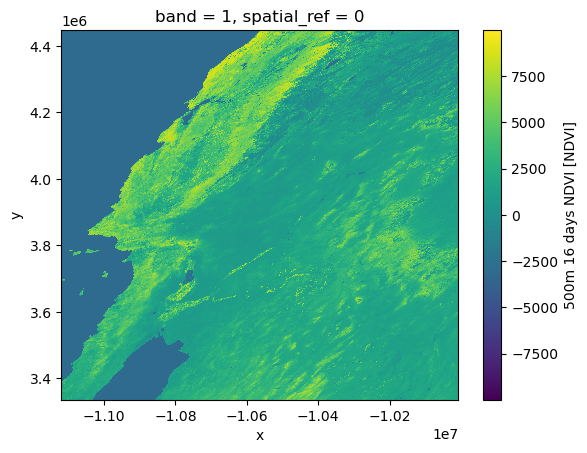

In [26]:
data.plot.imshow(cmap='viridis')

In [27]:
data.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [28]:
aoi = gpd.GeoDataFrame(geometry=[box(*box_bounds)], crs='epsg:4326').to_crs(data.rio.crs)
aoi

,geometry
0,"POLYGON ((-10597799.516 3954283.076, -10451586..."


In [29]:
raster_bbox = gpd.GeoDataFrame(geometry=[box(*data.rio.bounds())], crs=data.rio.crs)

<Axes: >

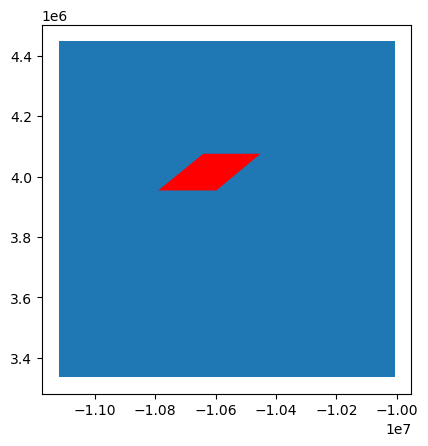

In [30]:
fig, ax = plt.subplots()
raster_bbox.plot(ax=ax)
aoi.plot(ax=ax, color='red')

In [33]:
extra_fields = item23.assets["500m_16_days_NDVI"].extra_fields["raster:bands"][0]

In [34]:
extra_fields['scale']

0.0001

In [45]:
ndvi.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [35]:
ndvi = data * extra_fields['scale']


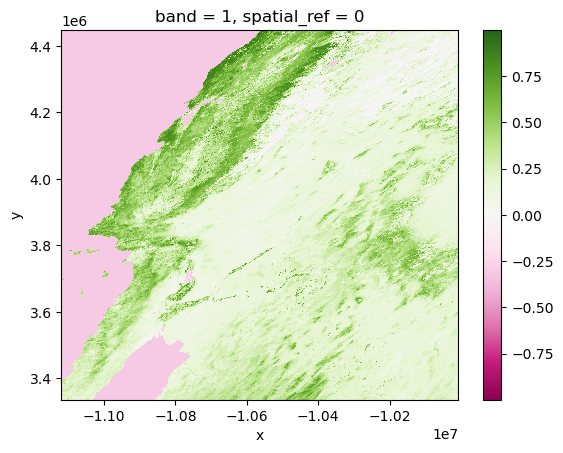

In [42]:
ndvi.plot.imshow(cmap="PiYG")

In [38]:
ndvi.rio.nodata

NoneType

In [43]:
ndvi.rio.to_raster('sierra_ndvi.tif')

In [44]:
rioxr.open_rasterio('sierra_ndvi.tif')

<xarray.DataArray (band: 1, y: 2400, x: 2400)>
[5760000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -1.112e+07 -1.112e+07 ... -1.001e+07 -1.001e+07
  * y            (y) float64 4.448e+06 4.447e+06 ... 3.337e+06 3.336e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0